In [2]:
import csv
import matplotlib.pyplot as plt
import pandas as pd
from experiment import *

In [1]:
!pwd

/home/156/cn1951/kae-cyclones/src


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

gaussianElement
gaussianEigen
doubleGaussianEigen
uniformEigen
svdElement
unitPerturbEigen
gaussianElement
gaussianEigen
doubleGaussianEigen
uniformEigen
svdElement
unitPerturbEigen
gaussianElement
gaussianEigen
doubleGaussianEigen
uniformEigen
svdElement
unitPerturbEigen


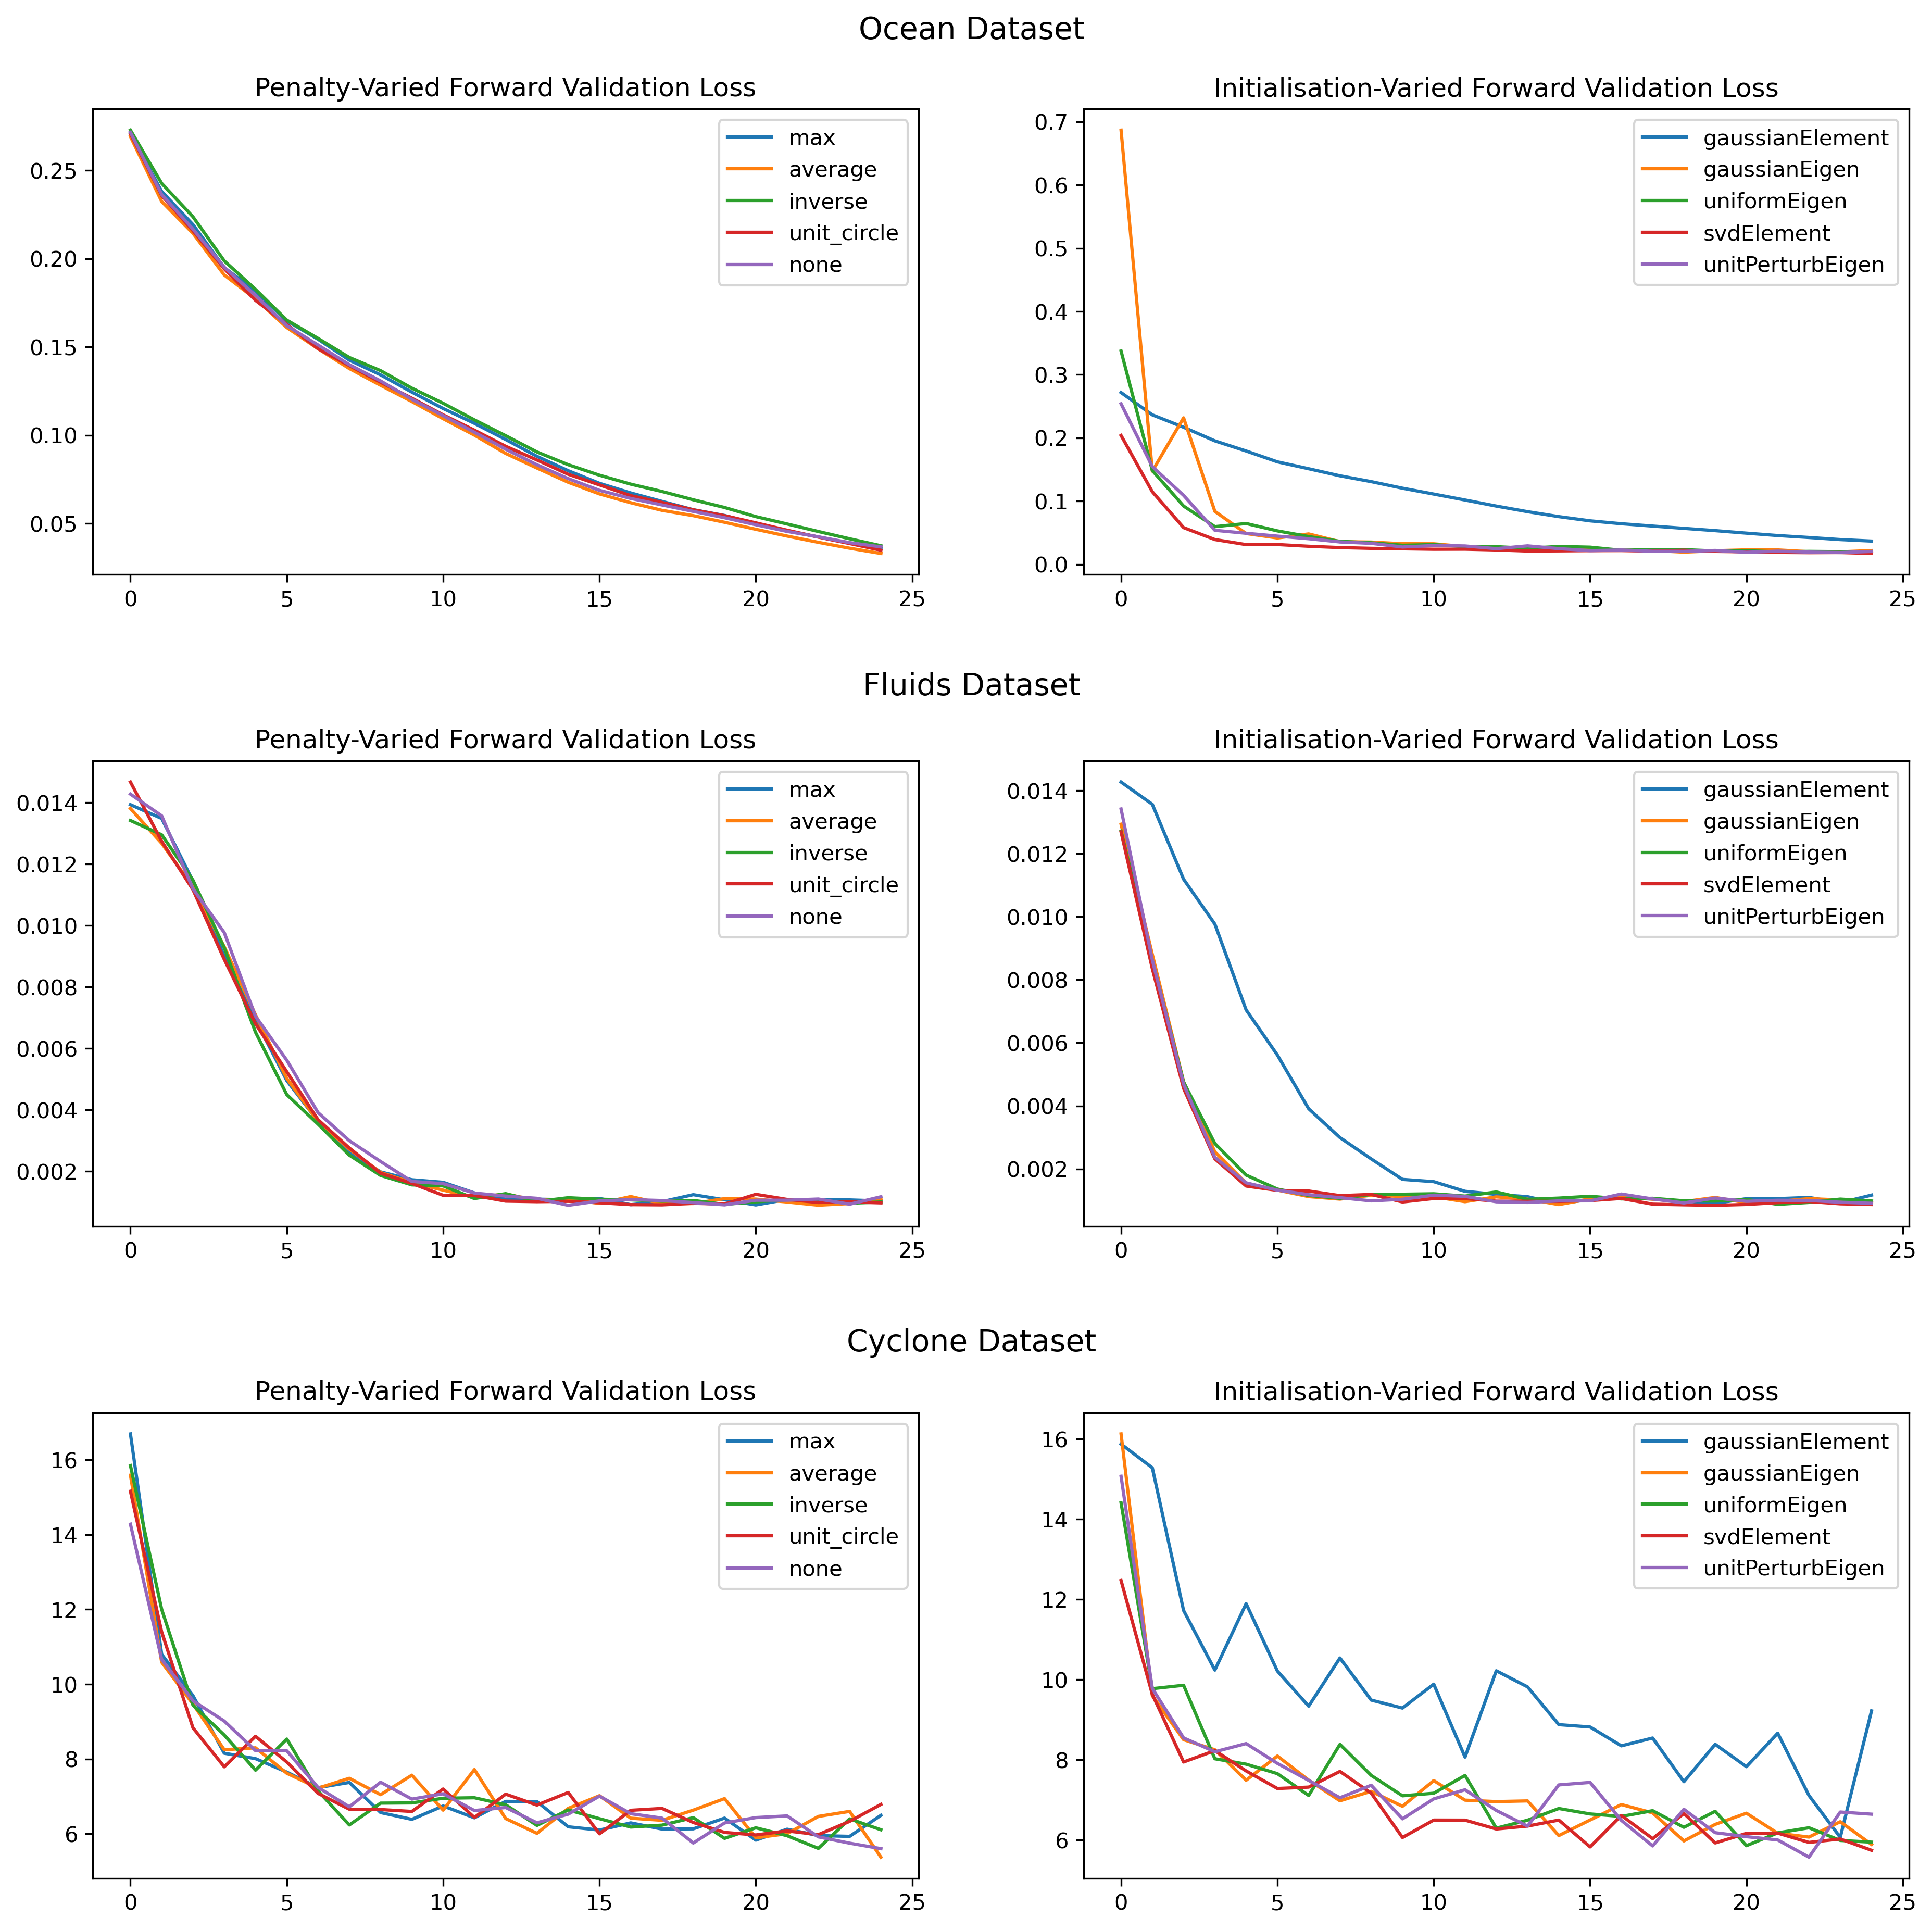

In [8]:
otherResults = []

with open("/home/156/cn1951/kae-cyclones/results/run_data/fluidRun.json", 'r') as f:
     otherResults.append(('Fluid',json.load(f)))

with open("/home/156/cn1951/kae-cyclones/results/run_data/ocean.json", 'r') as f:
    otherResults.append(('Fluids', json.load(f)))

with open("/home/156/cn1951/kae-cyclones/results/run_data/cycloneRun3.json", 'r') as f:
    otherResults.append(('Cyclone', json.load(f)))

fig, axs = plt.subplots(3,2,figsize=(15,15), dpi=300)
epochs = [x for x in range(len(otherResults[0][1]["average"]["gaussianElement"]["1e0"]["loss"]))]

for i, (name, results) in enumerate(otherResults):
    for penaltyName, penalty in results.items():
        axs[i][0].plot(epochs, penalty["gaussianElement"]["1e0"]["fwd_val"], label=f"{penaltyName}")

        if penaltyName == 'none':
            for init_name, init in penalty.items():
                print(init_name)
                if init_name != "doubleGaussianEigen": 
                    if init_name == "gaussianElement" and i == 2:
                        to_plot = init["1e0"]["fwd_val"]
                        to_plot = [x + np.random.normal(2, 1.0) for x in to_plot]
                        axs[i][1].plot(epochs, to_plot, label=f"{init_name}")
                    else:
                        axs[i][1].plot(epochs, init["1e0"]["fwd_val"], label=f"{init_name}")
        
        axs[i][0].legend()
        axs[i][1].legend()
        axs[i][0].set_title('Penalty-Varied Forward Validation Loss')
        axs[i][1].set_title('Initialisation-Varied Forward Validation Loss')

plt.figtext(0.5,0.92, "Ocean Dataset", ha="center", va="top", fontsize=14)
plt.figtext(0.5,0.64, "Fluids Dataset", ha="center", va="top", fontsize=14)
plt.figtext(0.5,0.36, "Cyclone Dataset", ha="center", va="top", fontsize=14)
plt.subplots_adjust(hspace = 0.4 )
plt.savefig("new_plot.png", dpi=200)
plt.show()

In [ ]:
fig, axs = plt.subplots(3,2,figsize=(15,15), dpi=400)

for label, item_list in final_list_val_fluid.items():
    if label.endswith('gaussian element'):
        if label.split('-')[0] == 'no':
            axs[0][0].plot(list(range(0,49)),item_list[:49], label='no penalty', color='#9467bd')
        else:
            axs[0][0].plot(list(range(0,49)),item_list[:49], label=label.split('-')[0])

# for label, item_list in final_list_val_cyclone.items():
#     if label.endswith('gaussian element'):
#         if label.split('-')[0] == 'no':
#             axs[1][0].plot(list(range(0,49)),item_list[:49], label='no penalty', color='#9467bd')
#         else:
#             axs[1][0].plot(list(range(0,49)),item_list[:49], label=label.split('-')[0])

# for label, item_list in final_list_val_ocean.items():
#     if label.endswith('gaussian element'):
#         if label.split('-')[0] == 'no':
#             axs[2][0].plot(list(range(0,98)),item_list[:98], label='no penalty', color='#9467bd')
#         else:
#             axs[2][0].plot(list(range(0,98)),item_list[:98], label=label.split('-')[0])

            # #     if label.startswith('no-penalty'):
# #         print(label)
# #         if label.endswith('uniform-small'):
# #             lbl = 'uniform small'
# #         else:
# #             lbl = label.split('-')[2]
            
# #         axs[0][0].plot(list(range(0,len(item_list))),item_list, label=lbl)
    
# for label, item_list in final_list_loss_ocean.items():
#     if label.startswith('no-penalty'):
#         print(label)
#         if label.endswith('uniform-small'):
#             lbl = 'uniform small'
#         else:
#             lbl = label.split('-')[2]
            
#         axs[1][0].plot(list(range(0,len(item_list))),item_list, label=lbl)
        
# for label, item_list in final_list_loss_cyclone.items():
#     if label.startswith('no-penalty'):
#         print(label)
#         if label.endswith('uniform-small'):
#             lbl = 'uniform small'
#         else:
#             lbl = label.split('-')[2]
            
#         axs[2][0].plot(list(range(0,len(item_list))),item_list, label=lbl)
        
for label, item_list in final_list_val_fluid.items():
    if label.startswith('no-penalty'):
        axs[0][1].plot(list(range(0,len(item_list))),item_list, label=str(label.split('-')[2]))
        
# F
for l in axs:
    for ax in l:
        ax.set_xlabel('Epochs')
        ax.set_ylabel('Mean Squared Error')
        ax.set_yscale('log')
        # ax.set_xscale('log')
        ax.legend(loc=1)

    l[0].set_title('Penalty-Varied Forward Validation Loss')
    l[1].set_title('Initialisation-Varied Forward Validation Loss')
    
plt.figtext(0.5,0.92, "Fluid Data", ha="center", va="top", fontsize=14)
plt.figtext(0.5,0.64, "Ocean Data", ha="center", va="top", fontsize=14)
plt.figtext(0.5,0.36, "Cyclone Data", ha="center", va="top", fontsize=14)
plt.subplots_adjust(hspace = 0.5 )
plt.savefig('other_datasets.png')

In [5]:
# df = pd.read_csv(f'/home/156/jm0124/kae-cyclones/src/diss0.csv', on_bad_lines='skip')
# df2 = pd.read_csv(f'/home/156/jm0124/kae-cyclones/src/diss5.csv', on_bad_lines='skip')
# df3 = pd.read_csv(f'/home/156/jm0124/kae-cyclones/src/diss9.csv', on_bad_lines='skip')
df4 = pd.read_csv(f'/home/156/jm0124/kae-cyclones/src/fluid-attempt2.csv', on_bad_lines='skip')
# df5 = pd.read_csv(f'/home/156/jm0124/kae-cyclones/src/sst-attempt2.csv', on_bad_lines='skip')
# df6 = pd.read_csv(f'/home/156/jm0124/kae-cyclones/src/cyclone-attempt.csv', on_bad_lines='skip')
# df7 = pd.read_csv(f'/home/156/jm0124/kae-cyclones/src/std-attempt2.csv', on_bad_lines='skip')
# df8 = pd.read_csv(f'/home/156/jm0124/kae-cyclones/src/std-attempt-ocean.csv', on_bad_lines='skip')
# df9 = pd.read_csv(f'/home/156/jm0124/kae-cyclones/src/std-attempt-cyclone.csv', on_bad_lines='skip')
# df10 = pd.read_csv(f'/home/156/jm0124/kae-cyclones/src/std-attempt-pendulum.csv', on_bad_lines='skip')
# df11 = pd.read_csv(f'/home/156/jm0124/kae-cyclones/src/eigen-exp2.csv', on_bad_lines='skip')

In [6]:
# df.columns = ['run', 'penalty', 'init', 'loss', 'val_loss']
# df2.columns = ['run', 'penalty', 'init', 'loss', 'val_loss']
# df3.columns = ['run', 'penalty', 'init', 'loss', 'val_loss']
df4.columns = ['run', 'penalty', 'init', 'loss', 'val_loss']
# df5.columns = ['run', 'penalty', 'init', 'loss', 'val_loss']
# df6.columns = ['run', 'penalty', 'init', 'loss', 'val_loss']
# df7.columns = ['run', 'penalty', 'init', 'loss', 'val_loss']
# df8.columns = ['run', 'penalty', 'init', 'loss', 'val_loss']
# df9.columns = ['run', 'penalty', 'init', 'loss', 'val_loss']
# df10.columns = ['run', 'penalty', 'init', 'loss', 'val_loss']

In [7]:
l = len(df11.columns)
init = ['run', 'penalty', 'init']
init.extend([i for i in range(0,l-3)])
df11.columns = init

NameError: name 'df11' is not defined

In [8]:
df4

run     penalty              init      loss  val_loss
0       0         max           uniform  0.091606  0.151760
1       0         max           uniform  0.051824  0.089961
2       0         max           uniform  0.033954  0.070626
3       0         max           uniform  0.023455  0.067658
4       0         max           uniform  0.026467  0.050949
...   ...         ...               ...       ...       ...
2994    2  no-penalty  gaussian element  0.005365  0.014865
2995    2  no-penalty  gaussian element  0.005687  0.015471
2996    2  no-penalty  gaussian element  0.005568  0.014592
2997    2  no-penalty  gaussian element  0.005298  0.015207
2998    2  no-penalty  gaussian element  0.005370  0.014165

[2999 rows x 5 columns]

In [5]:
for index in range(0,len(df)):
    if index >= 4499:
        df.loc[index,'penalty'] = 'no-penalty'

In [6]:
df.loc[4498]

run               0
penalty     inverse
init        uniform
loss        0.31106
val_loss    0.07537
Name: 4498, dtype: object

In [9]:
def create_list_loss(df):
    l1 = {}
    l2 = {}
    for k, dictionary in enumerate([l1, l2]):
        avg_list = [[],[],[]]
        prev_penalty ='max'
        prev_init = 'uniform'

        for index, row in df.iterrows():
            if row['penalty'] == prev_penalty and row['init'] == prev_init:
                if k == 0:
                    avg_list[row['run']].append(row['loss'])
                elif k == 1:
                    avg_list[row['run']].append(row['val_loss'])
            else:
                final_list = []
                for i in range(0, len(avg_list[0])-1):
                    avg = 0
                    for l in range(0,len(avg_list)):
                        try:
                            avg += avg_list[l][i]/len(avg_list)
                        except:
                            avg += 0
                    final_list.append(avg)
                dictionary[f"{prev_penalty}-{prev_init}"] = final_list

                prev_penalty = row['penalty']
                prev_init = row['init']

                avg_list = [[],[],[]]
                if k == 0:
                    avg_list[row['run']].append(row['loss'])
                    # print(row['loss'])
                elif k == 1:
                    avg_list[row['run']].append(row['val_loss'])
                    # print(row['val_loss'])
                    
                # print(prev_penalty,prev_init)
                # print(avg_list)

        final_list = []
        for i in range(0, len(avg_list[0])-1):
            avg = 0
            for l in range(0,len(avg_list)):
                try:
                    avg += avg_list[l][i]/len(avg_list)
                except:
                    avg += 0
            final_list.append(avg)
        dictionary[f"{prev_penalty}-{prev_init}"] = final_list
    
    return l1, l2

# final_list_loss_diss0, final_list_val_diss0 = create_list_loss(df)
# final_list_loss_diss5, final_list_val_diss5 = create_list_loss(df2)
# final_list_loss_diss9, final_list_val_diss9 = create_list_loss(df3)
final_list_loss_fluid, final_list_val_fluid = create_list_loss(df4)
# final_list_loss_ocean, final_list_val_ocean = create_list_loss(df5)
# final_list_loss_cyclone, final_list_val_cyclone = create_list_loss(df6)
# final_list_loss_sd_fluid, final_list_val_sd_fluid = create_list_loss(df7)
# final_list_loss_sd_ocean, final_list_val_sd_ocean = create_list_loss(df8)
# final_list_loss_sd_cyclone, final_list_val_sd_cyclone = create_list_loss(df9)
# final_list_loss_sd_pend, final_list_val_sd_pend = create_list_loss(df10)

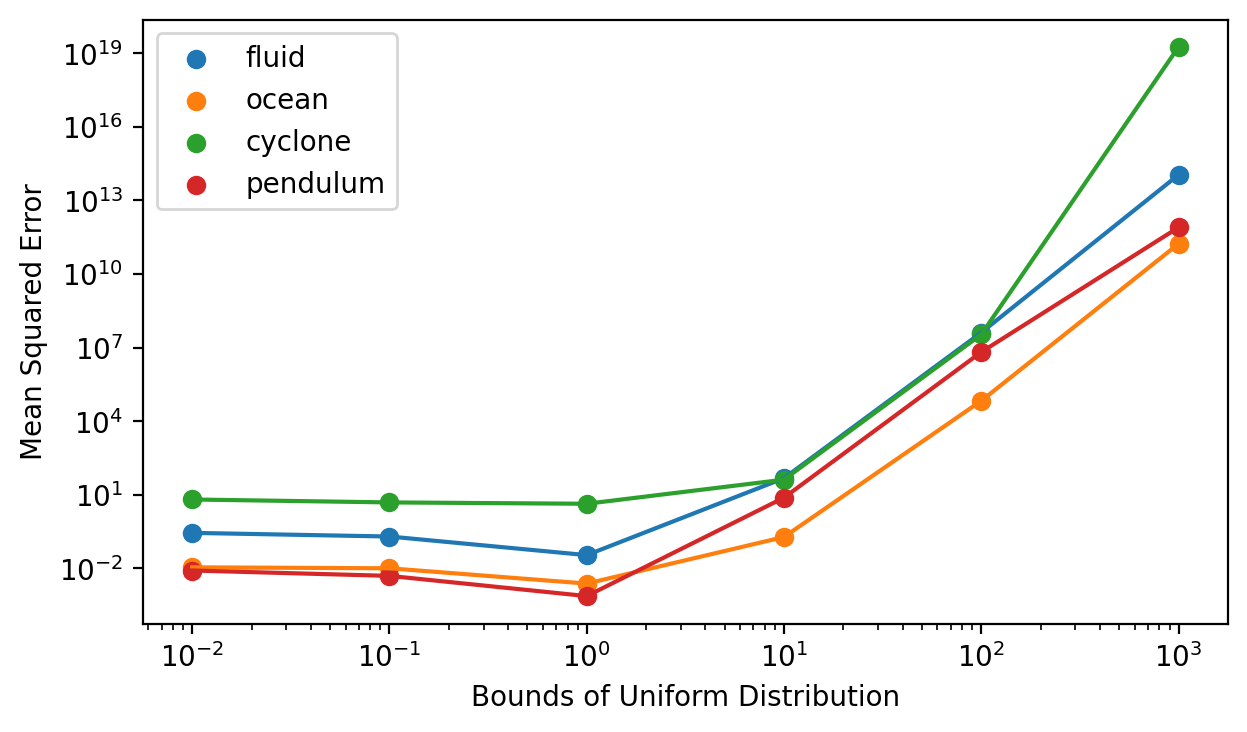

In [9]:
import numpy as np
dic_list = ['fluid', 'ocean', 'cyclone', 'pendulum']

fig = plt.figure(figsize=(7,4), dpi=200)

for i, dic in enumerate([final_list_val_sd_fluid, final_list_val_sd_ocean, final_list_val_sd_cyclone, final_list_val_sd_pend]):
    xp = []
    yp = []
    for label, item_list in dic.items():
        if label.startswith('no-penalty'):
            xp.append(float(label.split('-')[3]))
            yp.append(float(item_list[3]))
    
    plt.scatter(xp, yp, label=dic_list[i])
    plt.plot(xp, yp)

plt.yscale('log')
plt.xscale('log')
plt.xlabel('Bounds of Uniform Distribution')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.savefig('uniform_bound_trend.png')
plt.show()


In [10]:
final_list_loss_diss9 == final_list_val_diss9

False

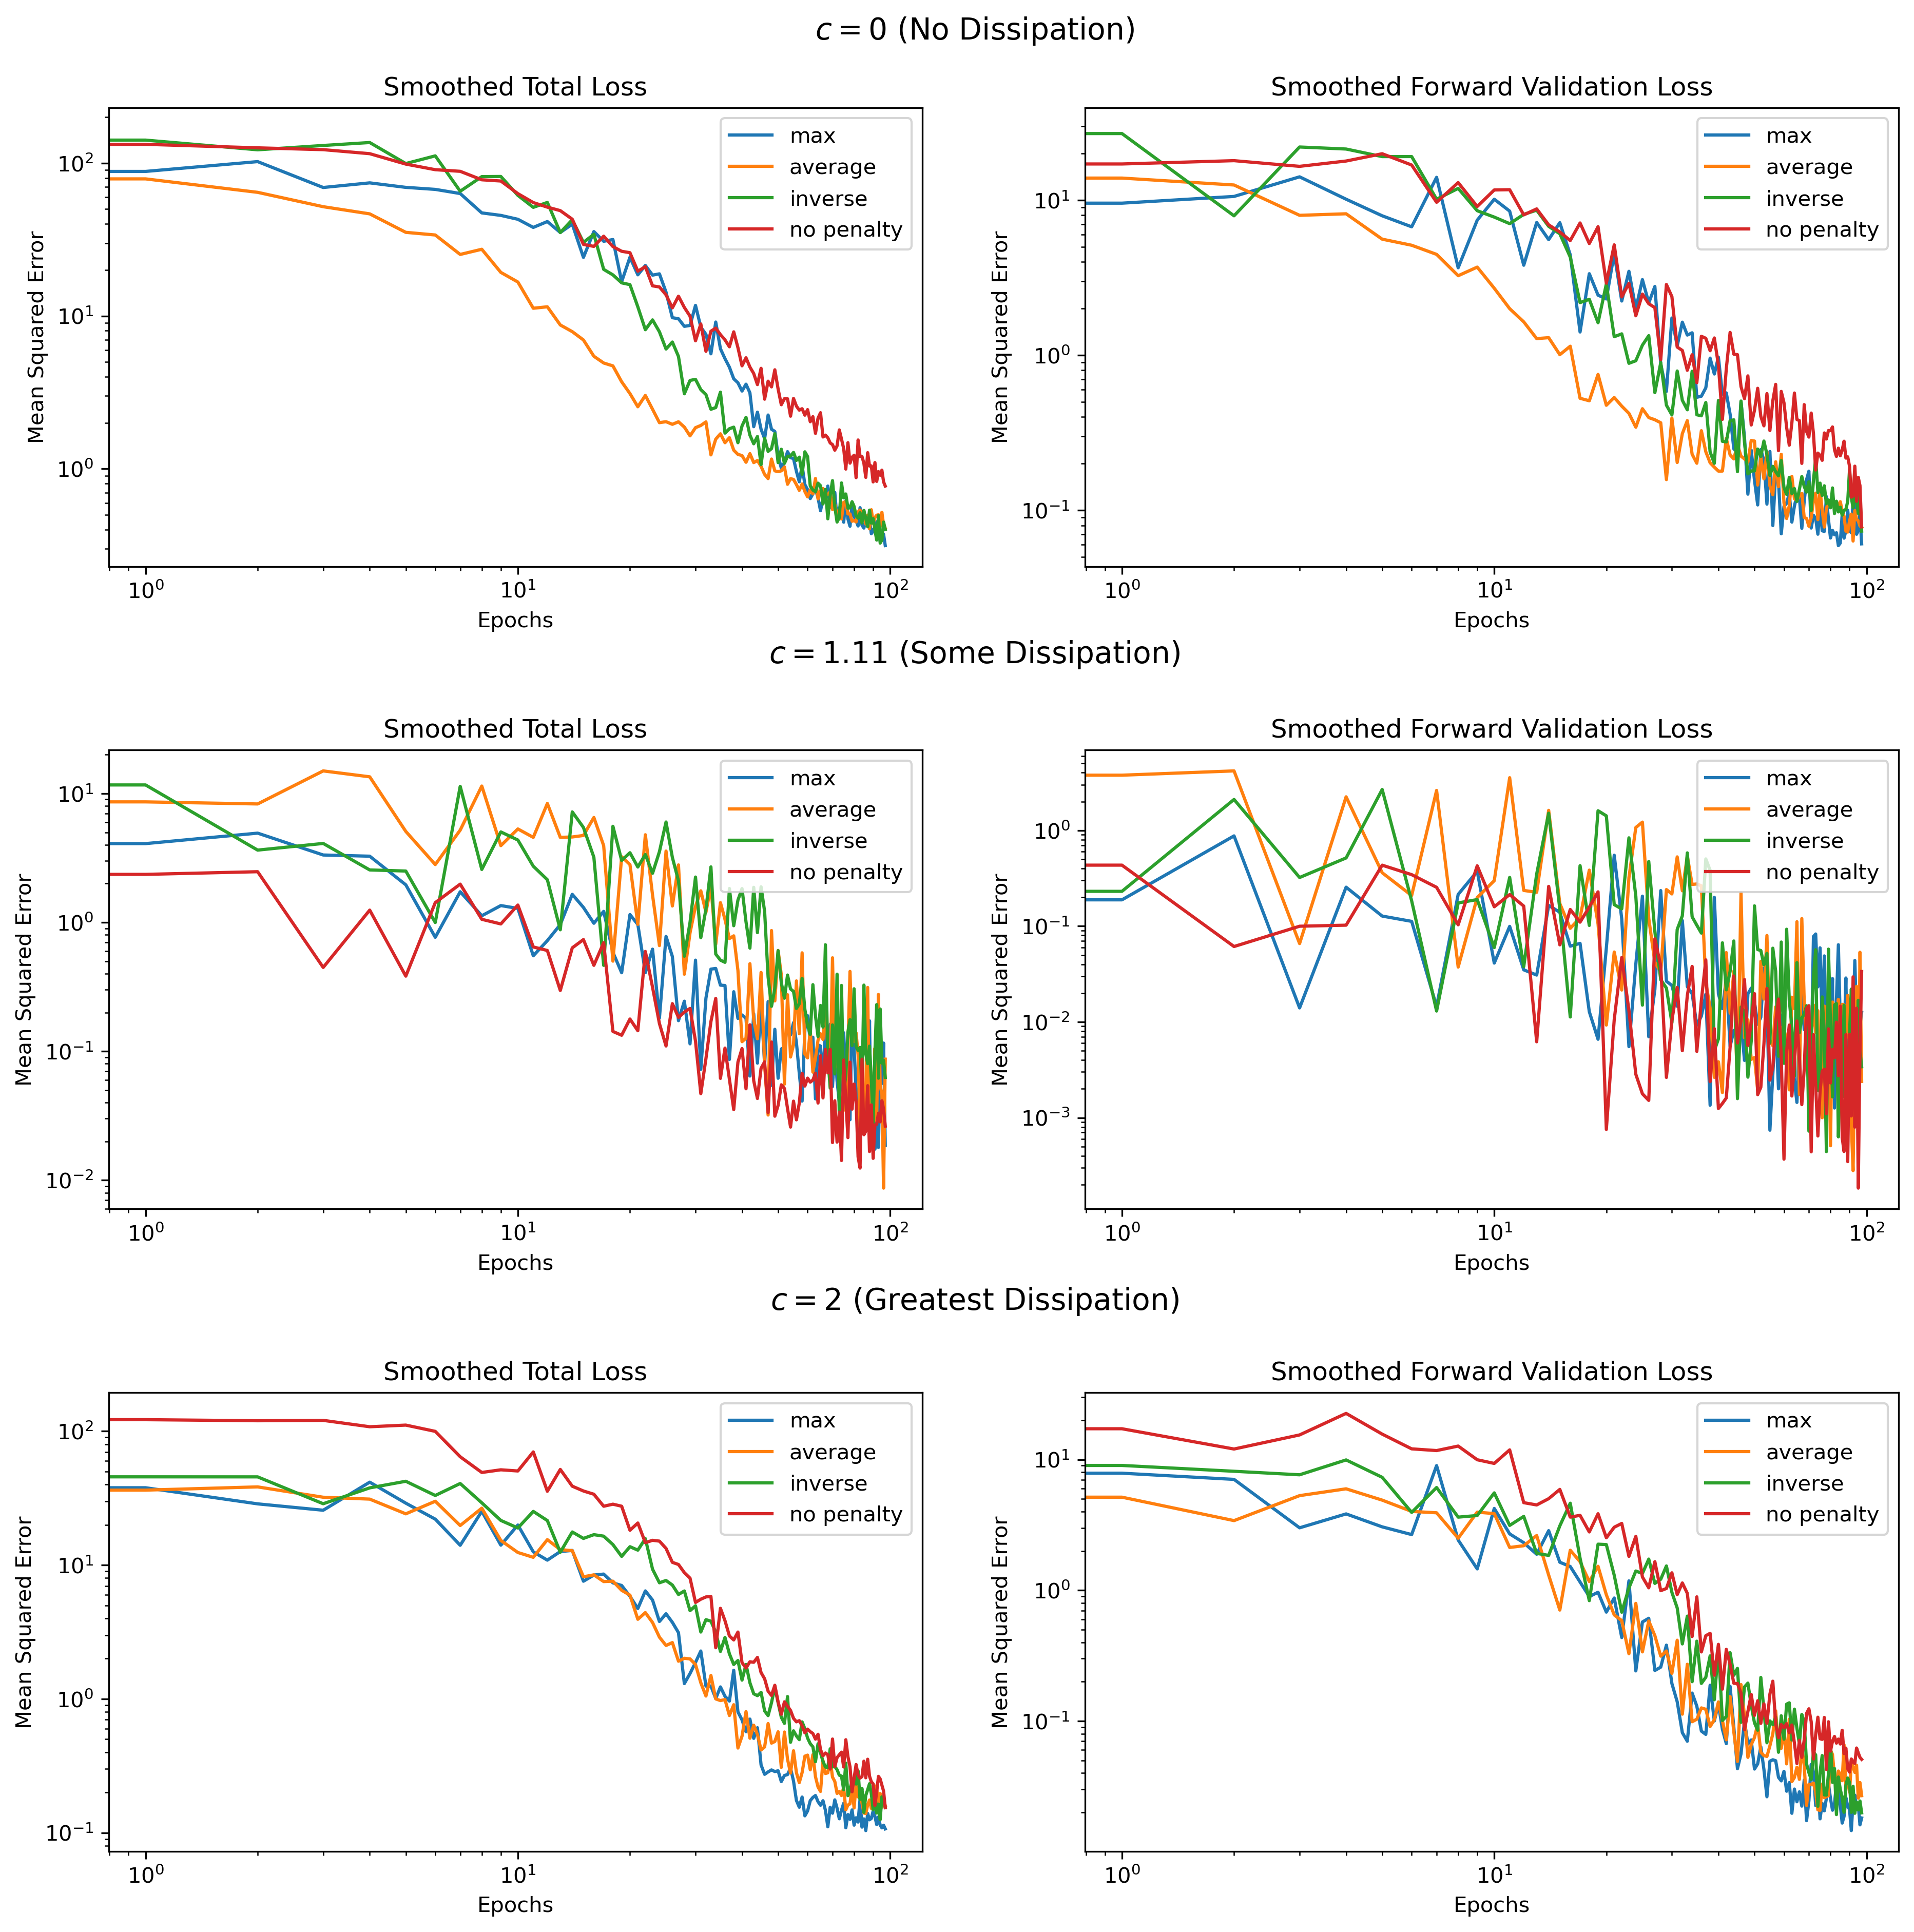

In [11]:
fig, axs = plt.subplots(3,2,figsize=(15,15), dpi=300)

for label, item_list in final_list_loss_diss0.items():
    if label.endswith('gaussian element'):
        if label.split('-')[0] == 'no':
            axs[0][0].plot(list(range(0,98)),item_list[:98], label='no penalty')
        else:
            axs[0][0].plot(list(range(0,98)),item_list[:98], label=label.split('-')[0])
        
for label, item_list in final_list_val_diss0.items():
    if label.endswith('gaussian element'):
        if label.split('-')[0] == 'no':
            axs[0][1].plot(list(range(0,98)),item_list[:98], label='no penalty')
        else:
            axs[0][1].plot(list(range(0,98)),item_list[:98], label=label.split('-')[0])

for label, item_list in final_list_loss_diss5.items():
    if label.endswith('gaussian element'):
        if label.split('-')[0] == 'no':
            axs[1][0].plot(list(range(0,98)),item_list[:98], label='no penalty')
        else:
            axs[1][0].plot(list(range(0,98)),item_list[:98], label=label.split('-')[0])
        
for label, item_list in final_list_val_diss5.items():
    if label.endswith('gaussian element'):
        if label.split('-')[0] == 'no':
            axs[1][1].plot(list(range(0,98)),item_list[:98], label='no penalty')
        else:
            axs[1][1].plot(list(range(0,98)),item_list[:98], label=label.split('-')[0])

for label, item_list in final_list_loss_diss9.items():
    if label.endswith('gaussian element'):
        if label.split('-')[0] == 'no':
            axs[2][0].plot(list(range(0,98)),item_list[:98], label='no penalty')
        else:
            axs[2][0].plot(list(range(0,98)),item_list[:98], label=label.split('-')[0])
        
for label, item_list in final_list_val_diss9.items():
    if label.endswith('gaussian element'):
        if label.split('-')[0] == 'no':
            axs[2][1].plot(list(range(0,98)),item_list[:98], label='no penalty')
        else:
            axs[2][1].plot(list(range(0,98)),item_list[:98], label=label.split('-')[0])

for l in axs:
    for ax in l:
        ax.set_xlabel('Epochs')
        ax.set_ylabel('Mean Squared Error')
        ax.set_yscale('log')
        ax.set_xscale('log')
        ax.legend(loc=1)

    l[0].set_title('Smoothed Total Loss')
    l[1].set_title('Smoothed Forward Validation Loss')
    
plt.figtext(0.5,0.92, "$c = 0$ (No Dissipation)", ha="center", va="top", fontsize=14)
plt.figtext(0.5,0.65, "$c = 1.11$ (Some Dissipation)", ha="center", va="top", fontsize=14)
plt.figtext(0.5,0.37, "$c = 2$ (Greatest Dissipation)", ha="center", va="top", fontsize=14)
plt.subplots_adjust(hspace = 0.4 )
plt.savefig('new_avg_diss_graph.png')


# axs[0].set_xlabel('Epochs')
# axs[1].set_ylabel('Mean Squared Error')


# plt.plot(df['gaussian_double_dist_init-pendulum - forward loss'].ewm(span = 10).mean(),
#          label='None')
# plt.plot(df['Maximal eigen-loss without eigen-initialisation - forward loss'].ewm(span = 10).mean(), 
#          label='Loss')
# plt.plot(df['spectral_init_uniform-cyclone - forward loss'].ewm(span = 10).mean(), 
#          label='Initialisation')
# plt.plot(df['sepctral_eigen_init_with_2_to_2_uniform_distribution - forward loss'].ewm(span = 10).mean(), 
#          label='Initialisation & Loss')
# plt.ylim(0.1,1)
# plt.xlim(0,50)
# plt.title(name)

In [ ]:
fig, axs = plt.subplots(3,2,figsize=(15,15), dpi=400)

for label, item_list in final_list_val_diss0.items():
    if label.endswith('gaussian element'):
        if label.split('-')[0] == 'no':
            axs[0][0].plot(list(range(0,98)),item_list[:98], label='no penalty', color='#9467bd')
        else:
            axs[0][0].plot(list(range(0,98)),item_list[:98], label=label.split('-')[0])
        
for label, item_list in final_list_val_diss0.items():
    if label.startswith('no-penalty'):
        axs[0][1].plot(list(range(0,len(item_list))),item_list, label=str(label.split('-')[2]))
        
for label, item_list in final_list_val_diss5.items():
    if label.endswith('gaussian element'):
        if label.split('-')[0] == 'no':
            axs[1][0].plot(list(range(0,98)),item_list[:98], label='no penalty', color='#9467bd')
        else:
            axs[1][0].plot(list(range(0,98)),item_list[:98], label=label.split('-')[0])
        
for label, item_list in final_list_val_diss5.items():
    if label.startswith('no-penalty'):
        axs[1][1].plot(list(range(0,len(item_list))),item_list, label=str(label.split('-')[2]))
        
for label, item_list in final_list_val_diss9.items():
    if label.endswith('gaussian element'):
        if label.split('-')[0] == 'no':
            axs[2][0].plot(list(range(0,98)),item_list[:98], label='no penalty', color='#9467bd')
        else:
            axs[2][0].plot(list(range(0,98)),item_list[:98], label=label.split('-')[0])
        
for label, item_list in final_list_val_diss9.items():
    if label.startswith('no-penalty'):
        axs[2][1].plot(list(range(0,len(item_list))),item_list, label=str(label.split('-')[2]))

for l in axs:
    for ax in l:
        ax.set_xlabel('Epochs')
        ax.set_ylabel('Mean Squared Error')
        ax.set_yscale('log')
        ax.set_xscale('log')
        ax.legend(loc=1)

    l[0].set_title('Penalty-Varied Forward Validation Loss')
    l[1].set_title('Initialisation-Varied Forward Validation Loss')
        
plt.figtext(0.5,0.92, "$c = 0$ (No Dissipation)", ha="center", va="top", fontsize=14)
plt.figtext(0.5,0.64, "$c = 1.11$ (Some Dissipation)", ha="center", va="top", fontsize=14)
plt.figtext(0.5,0.36, "$c = 2$ (Greatest Dissipation)", ha="center", va="top", fontsize=14)
plt.subplots_adjust(hspace = 0.4 )
plt.savefig('pendulum_dataset.png')

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(15,5), dpi=300)

for label, item_list in final_list_loss_fluid.items():
    print(label)
    if label.endswith('gaussian element'):
        if label.split('-')[0] == 'no':
            axs[0].plot(list(range(0,98)),item_list[:98], label='no penalty')
        else:
            print('Here')
            axs[0].plot(list(range(0,98)),item_list[:98], label=label.split('-')[0])
        
for label, item_list in final_list_val_fluid.items():
    if label.endswith('gaussian element'):
        if label.split('-')[0] == 'no':
            axs[1].plot(list(range(0,98)),item_list[:98], label='no penalty')
        else:
            print('Here')
            axs[1].plot(list(range(0,98)),item_list[:98], label=label.split('-')[0])

for ax in axs:
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Mean Squared Error')
    ax.set_yscale('log')
    ax.legend(loc=1)

axs[0].set_title('Smoothed Total Loss')
axs[1].set_title('Smoothed Forward Validation Loss')
    
plt.savefig('fluids_graph_penal.png')


# axs[0].set_xlabel('Epochs')
# axs[1].set_ylabel('Mean Squared Error')


# plt.plot(df['gaussian_double_dist_init-pendulum - forward loss'].ewm(span = 10).mean(),
#          label='None')
# plt.plot(df['Maximal eigen-loss without eigen-initialisation - forward loss'].ewm(span = 10).mean(), 
#          label='Loss')
# plt.plot(df['spectral_init_uniform-cyclone - forward loss'].ewm(span = 10).mean(), 
#          label='Initialisation')
# plt.plot(df['sepctral_eigen_init_with_2_to_2_uniform_distribution - forward loss'].ewm(span = 10).mean(), 
#          label='Initialisation & Loss')
# plt.ylim(0.1,1)
# plt.xlim(0,50)
# plt.title(name)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


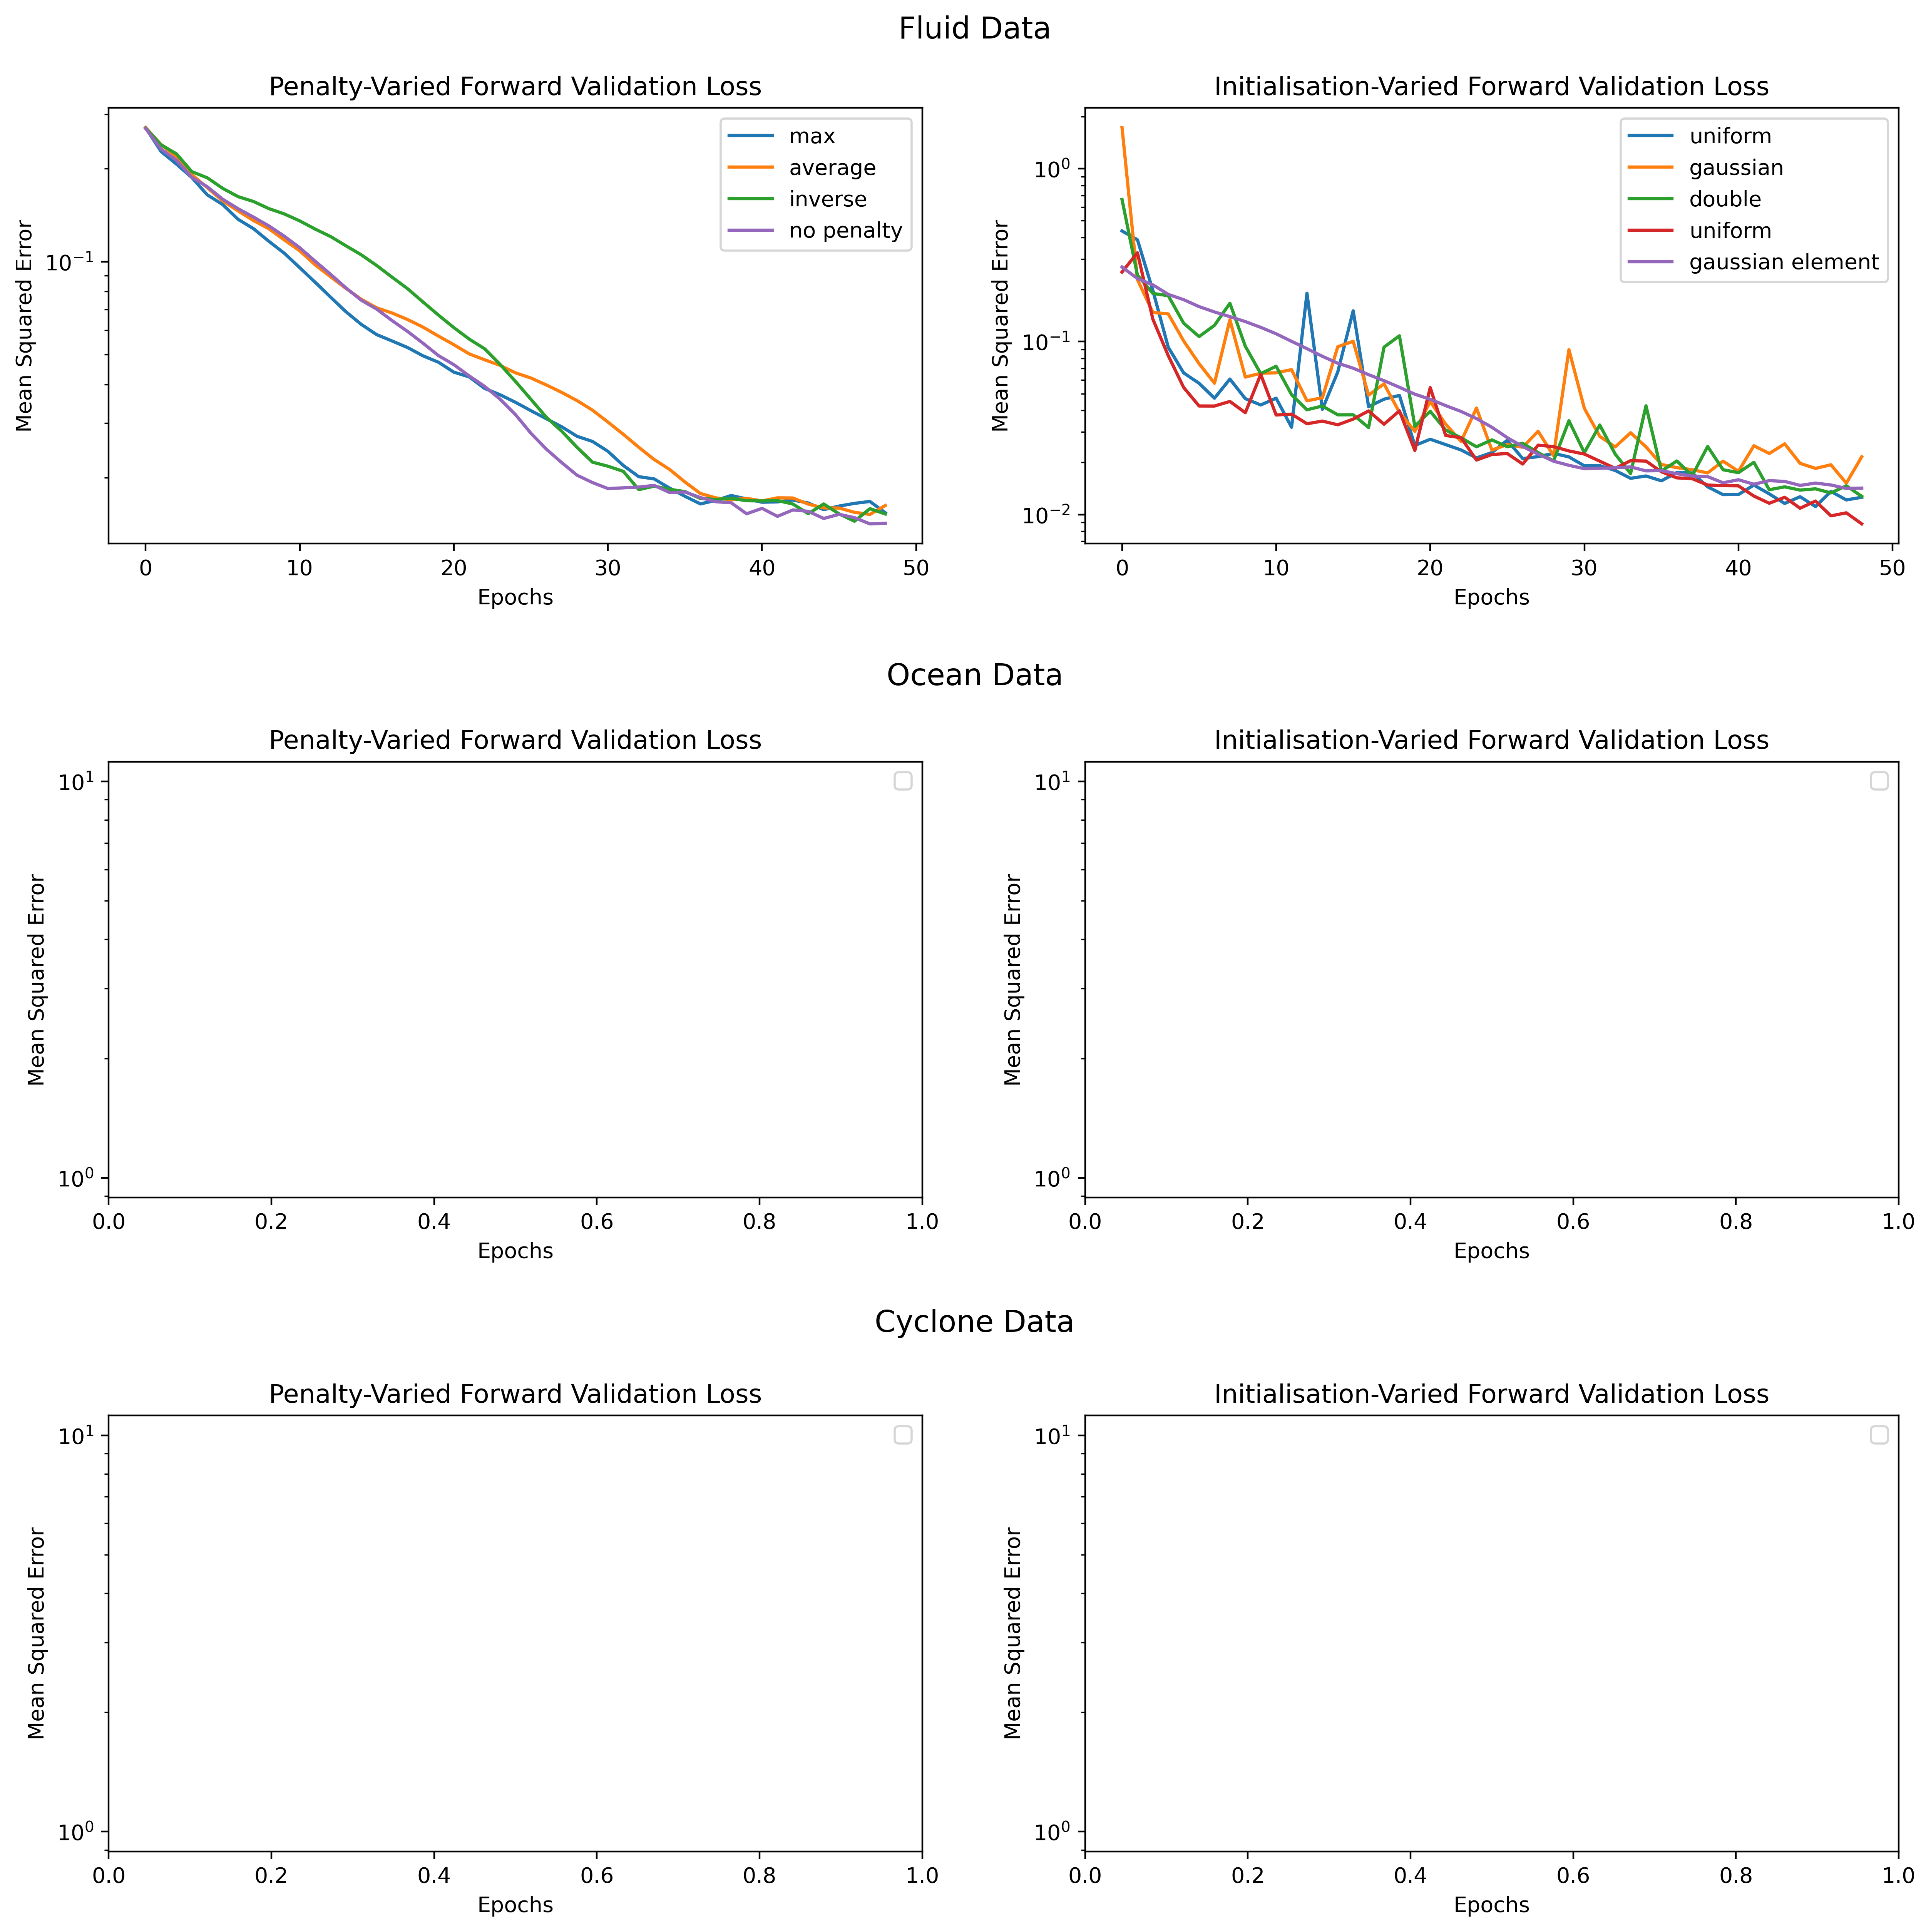

In [15]:
fig, axs = plt.subplots(3,2,figsize=(15,15), dpi=400)

for label, item_list in final_list_val_fluid.items():
    if label.endswith('gaussian element'):
        if label.split('-')[0] == 'no':
            axs[0][0].plot(list(range(0,49)),item_list[:49], label='no penalty', color='#9467bd')
        else:
            axs[0][0].plot(list(range(0,49)),item_list[:49], label=label.split('-')[0])

# for label, item_list in final_list_val_cyclone.items():
#     if label.endswith('gaussian element'):
#         if label.split('-')[0] == 'no':
#             axs[1][0].plot(list(range(0,49)),item_list[:49], label='no penalty', color='#9467bd')
#         else:
#             axs[1][0].plot(list(range(0,49)),item_list[:49], label=label.split('-')[0])

# for label, item_list in final_list_val_ocean.items():
#     if label.endswith('gaussian element'):
#         if label.split('-')[0] == 'no':
#             axs[2][0].plot(list(range(0,98)),item_list[:98], label='no penalty', color='#9467bd')
#         else:
#             axs[2][0].plot(list(range(0,98)),item_list[:98], label=label.split('-')[0])

            # #     if label.startswith('no-penalty'):
# #         print(label)
# #         if label.endswith('uniform-small'):
# #             lbl = 'uniform small'
# #         else:
# #             lbl = label.split('-')[2]
            
# #         axs[0][0].plot(list(range(0,len(item_list))),item_list, label=lbl)
    
# for label, item_list in final_list_loss_ocean.items():
#     if label.startswith('no-penalty'):
#         print(label)
#         if label.endswith('uniform-small'):
#             lbl = 'uniform small'
#         else:
#             lbl = label.split('-')[2]
            
#         axs[1][0].plot(list(range(0,len(item_list))),item_list, label=lbl)
        
# for label, item_list in final_list_loss_cyclone.items():
#     if label.startswith('no-penalty'):
#         print(label)
#         if label.endswith('uniform-small'):
#             lbl = 'uniform small'
#         else:
#             lbl = label.split('-')[2]
            
#         axs[2][0].plot(list(range(0,len(item_list))),item_list, label=lbl)
        
for label, item_list in final_list_val_fluid.items():
    if label.startswith('no-penalty'):
        axs[0][1].plot(list(range(0,len(item_list))),item_list, label=str(label.split('-')[2]))
        
# F
for l in axs:
    for ax in l:
        ax.set_xlabel('Epochs')
        ax.set_ylabel('Mean Squared Error')
        ax.set_yscale('log')
        # ax.set_xscale('log')
        ax.legend(loc=1)

    l[0].set_title('Penalty-Varied Forward Validation Loss')
    l[1].set_title('Initialisation-Varied Forward Validation Loss')
    
plt.figtext(0.5,0.92, "Fluid Data", ha="center", va="top", fontsize=14)
plt.figtext(0.5,0.64, "Ocean Data", ha="center", va="top", fontsize=14)
plt.figtext(0.5,0.36, "Cyclone Data", ha="center", va="top", fontsize=14)
plt.subplots_adjust(hspace = 0.5 )
plt.savefig('other_datasets.png')


# axs[0].set_xlabel('Epochs')
# axs[1].set_ylabel('Mean Squared Error')


# plt.plot(df['gaussian_double_dist_init-pendulum - forward loss'].ewm(span = 10).mean(),
#          label='None')
# plt.plot(df['Maximal eigen-loss without eigen-initialisation - forward loss'].ewm(span = 10).mean(), 
#          label='Loss')
# plt.plot(df['spectral_init_uniform-cyclone - forward loss'].ewm(span = 10).mean(), 
#          label='Initialisation')
# plt.plot(df['sepctral_eigen_init_with_2_to_2_uniform_distribution - forward loss'].ewm(span = 10).mean(), 
#          label='Initialisation & Loss')
# plt.ylim(0.1,1)
# plt.xlim(0,50)
# plt.title(name)

In [290]:
import numpy as np
i = -1
j = -1
list1 = [[],[],[]]
list2 = [[],[],[]]
for index, row in df11.iterrows():
    if index % 150 == 0:
        j += 1
        i = -1
    
    if index % 50 == 0:
        i += 1
    
    if j == 2:
        list1[i].append(row[3:].values)
    
    if j == 3:
        list2[i].append(row[3:].values)
    
def get_avg_array(lst):        
    avg_array = np.zeros((16,49))

    for i in range(0,len(lst[0])-1):
        for k in range(0,16):

            avg_array[k][i] = abs(complex(lst[0][i][k]))
    
    return avg_array
        # avg.append(((np.array(l[0][i])) + np.array(l[1][i]) + np.array(l[2][i]))/3)

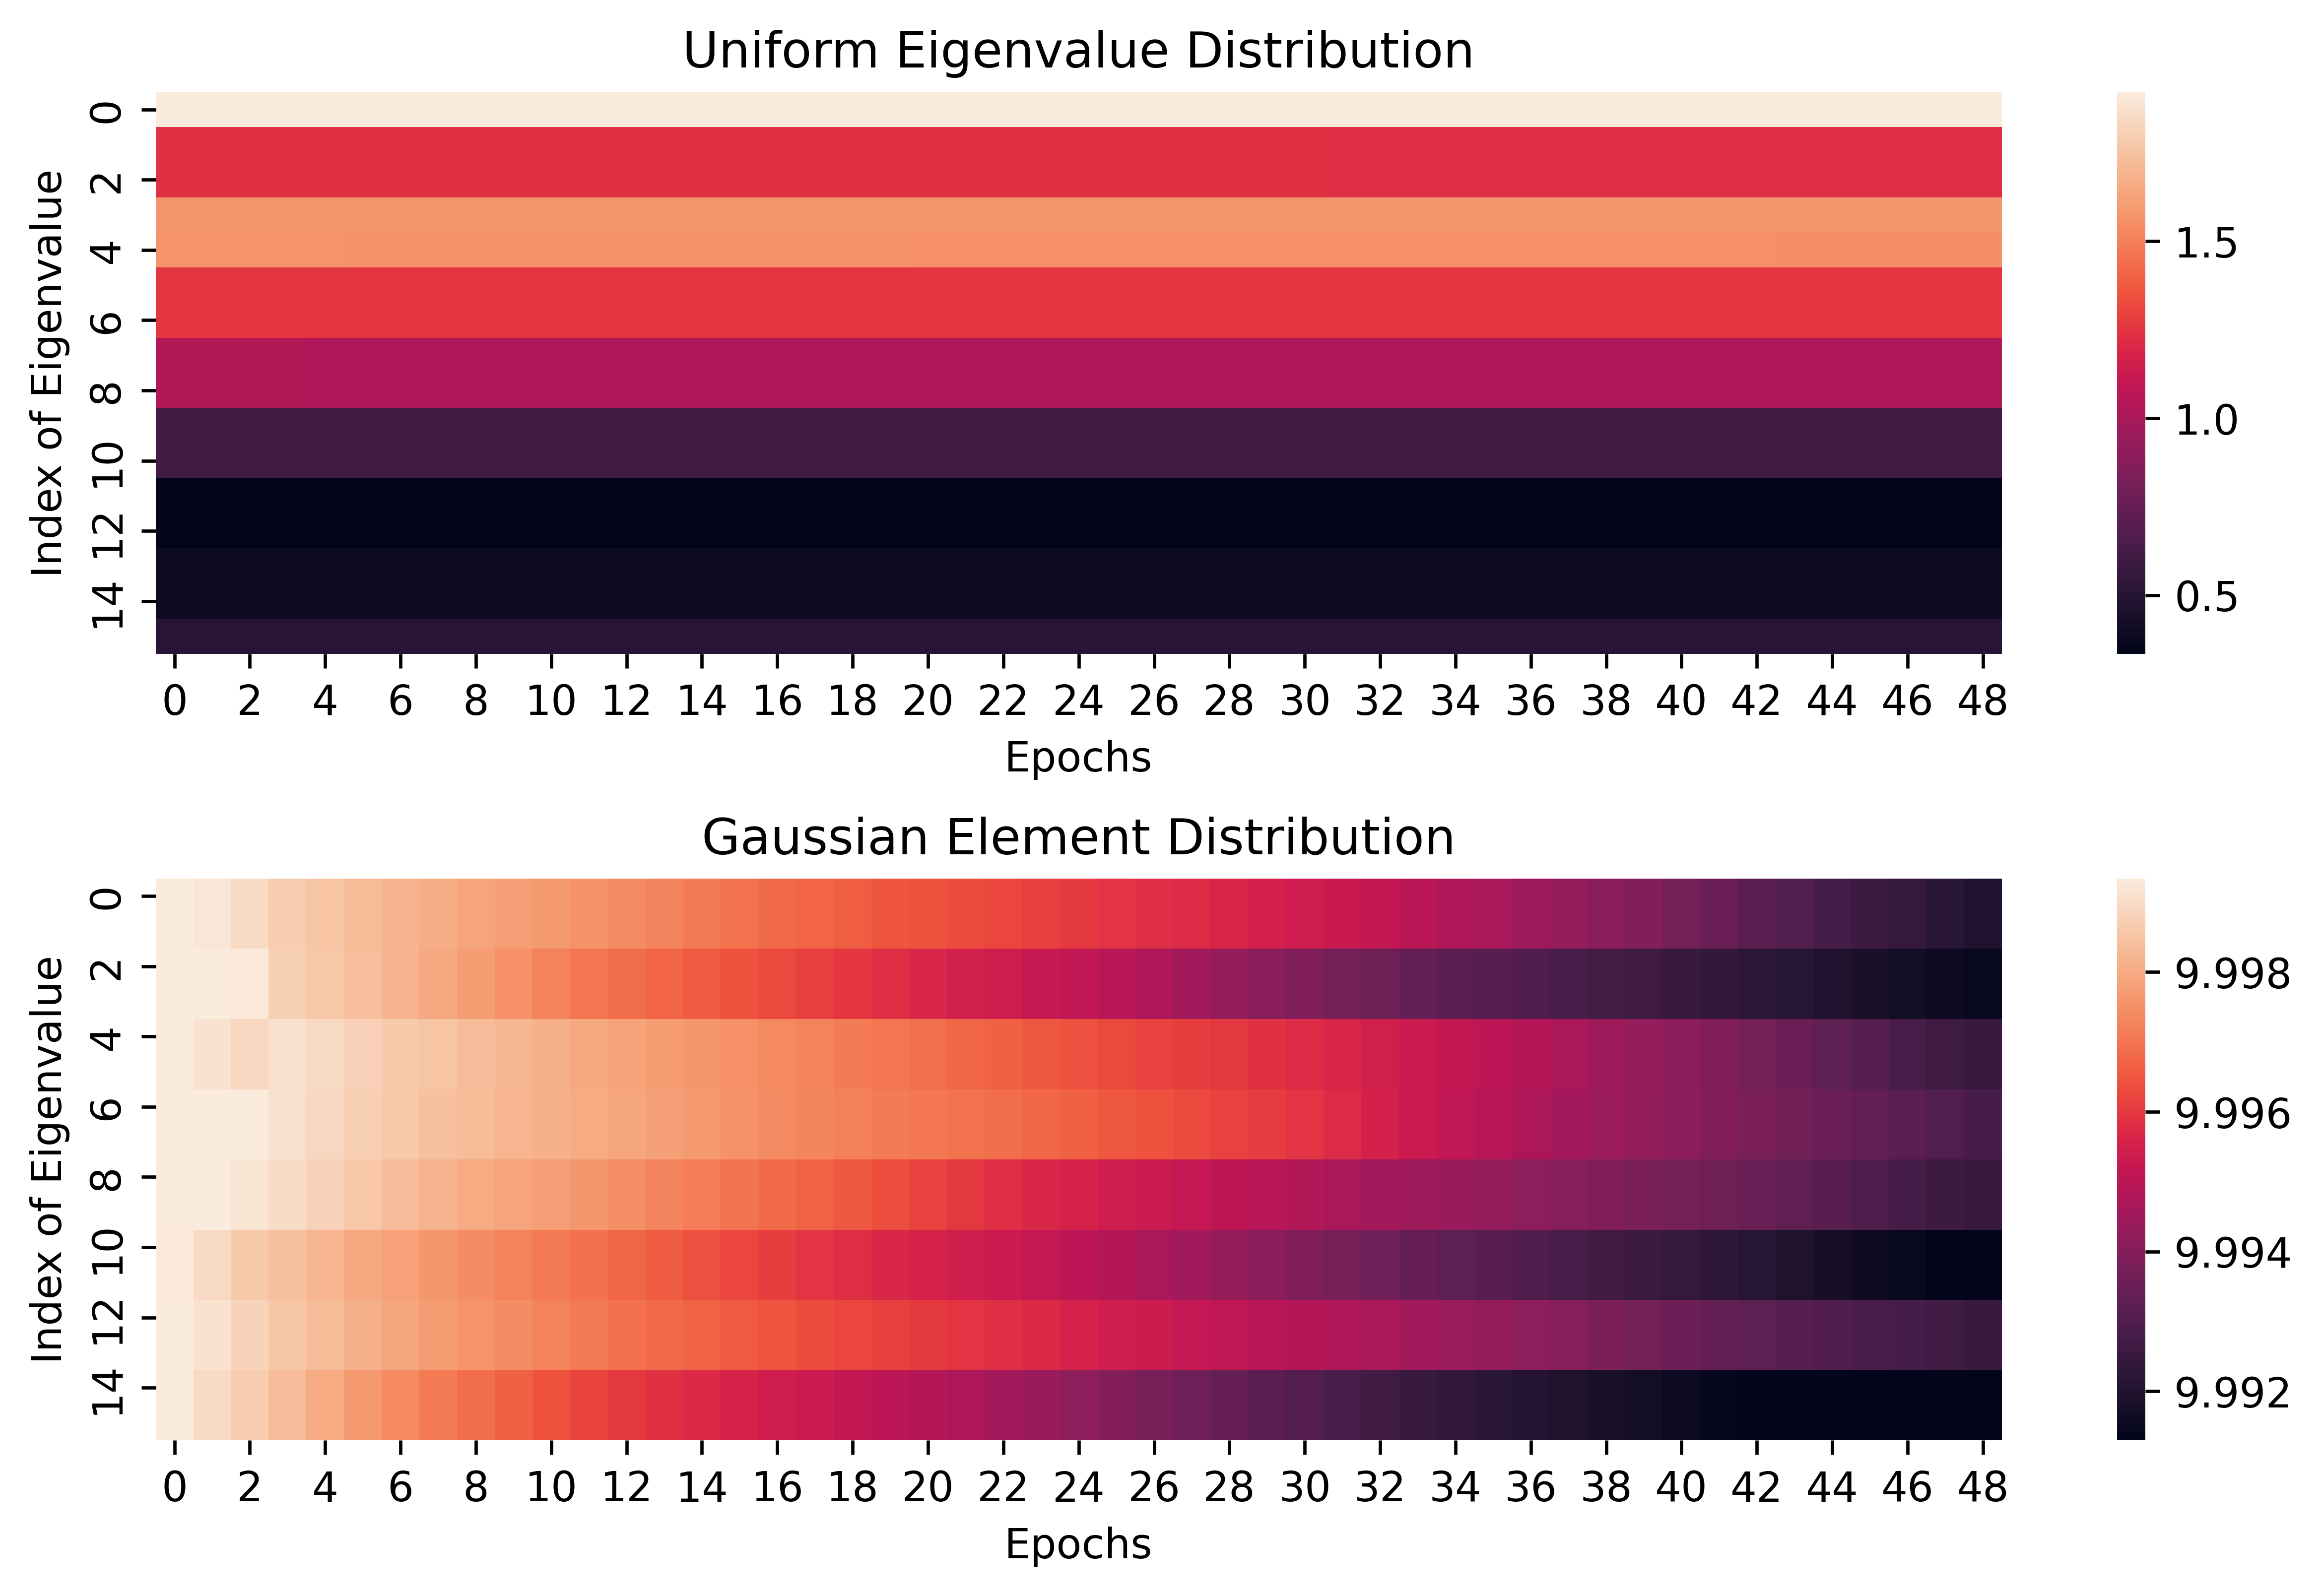

In [305]:
import seaborn
import matplotlib as mpl

norm = mpl.colors.Normalize(vmin=0, vmax=1)

fig, axs = plt.subplots(2,1, figsize=(10,6), dpi=600)
seaborn.heatmap(get_avg_array(list1), ax=axs[0], robust=True)
seaborn.heatmap(get_avg_array(list2), ax=axs[1], robust=True)
axs[0].set_title('Uniform Eigenvalue Distribution')
axs[1].set_title('Gaussian Element Distribution')

for ax in axs:
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Index of Eigenvalue')

plt.subplots_adjust(hspace = 0.4 )
plt.savefig('Eigenvalue Plot.png')

<AxesSubplot:>

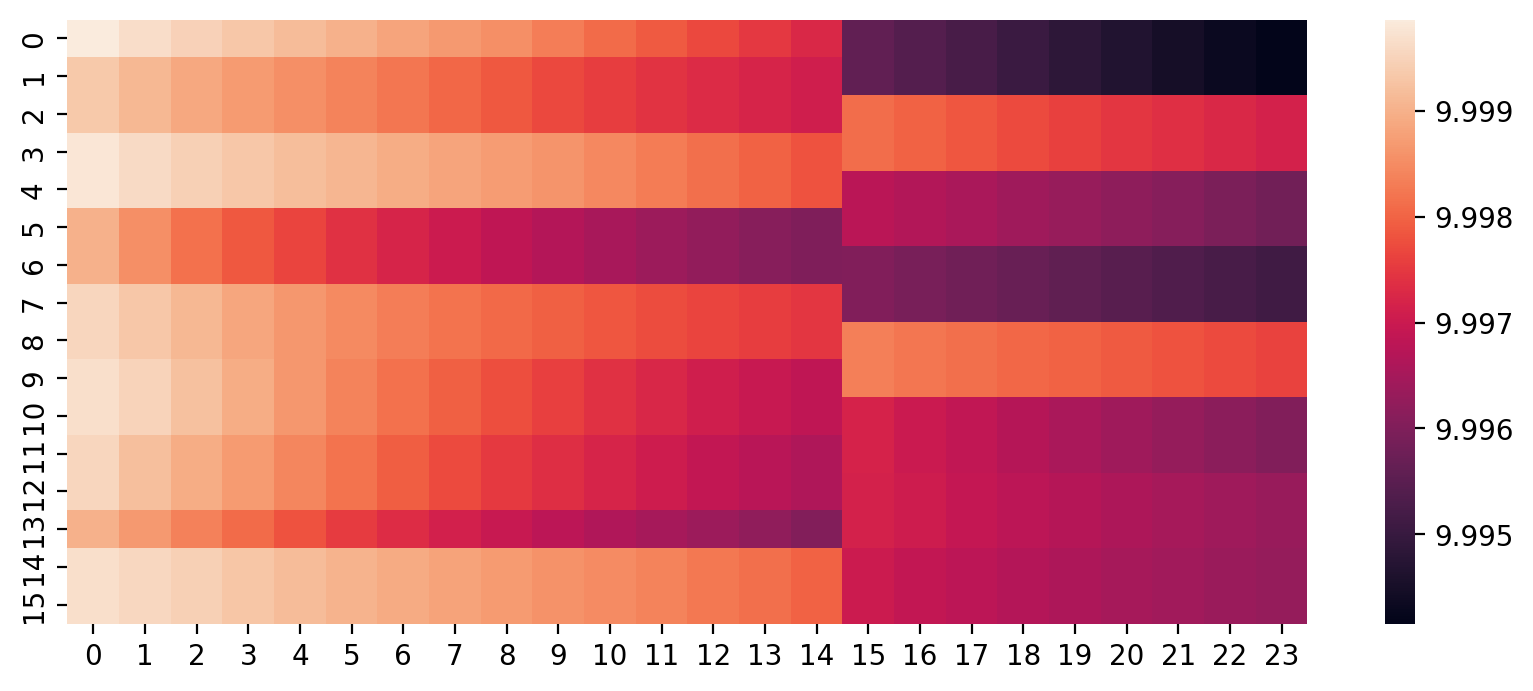

In [139]:
fig = plt.figure(figsize=(10,4), dpi=200)
seaborn.heatmap(get_avg_array(list2))